In [5]:
from geovoronoi import voronoi_regions_from_coords
import numpy as np
import pytess
import geopandas
from scipy.spatial import Voronoi, voronoi_plot_2d
import matplotlib.pyplot as plt
from shapely.geometry import Polygon
import shapely.geometry
import shapely.ops

In [ ]:
#Getting Voroni from Scipy

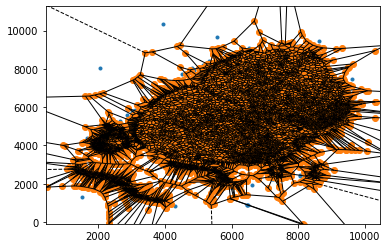

In [4]:
mat = np.load('centroid_matrix.npy')
vor = Voronoi(mat)
fig = voronoi_plot_2d(vor)
plt.show()

In [6]:
lines = [
    shapely.geometry.LineString(vor.vertices[line])
    for line in vor.ridge_vertices
    if -1 not in line
]

h=shapely.ops.polygonize(lines)

polygon_list = []
for pol in h:
    polygon_list.append(pol)
    
gdf_from_line = geopandas.GeoDataFrame(
    {
        'geometry': polygon_list, 
        'id': ['P-%s'%str(i).zfill(2) for i in range(len(polygon_list))]
    }
)
    


In [ ]:
#Getting Polygons From Pytess

In [8]:
voronoipolys = pytess.voronoi(mat)

In [33]:
np.shape(voronoipolys)

/gpfs/commons/home/jsingh/.conda/envs/voronoi/lib/python3.10/site-packages/numpy/core/fromnumeric.py:2007: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  result = asarray(a).shape


(9634, 2)

/tmp/ipykernel_131556/3516992480.py:5: DeprecationWarning: Please use `Delaunay` from the `scipy.spatial` namespace, the `scipy.spatial.qhull` namespace is deprecated.
  hull = sp.spatial.qhull.Delaunay(mat).convex_hull


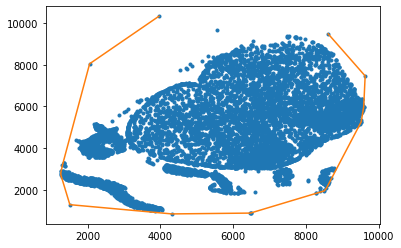

In [36]:
import numpy as np
import scipy as sp

# random point cloud and hull
hull = sp.spatial.qhull.Delaunay(mat).convex_hull

# sort hull indices using (sparse) adjacency matrix graph stuff
g = sp.sparse.csr_matrix((np.ones(hull.shape[0]),hull.T), shape=(hull.max()+1,)*2)
sorted_hull = sp.sparse.csgraph.depth_first_order(g,hull[0,0],directed=False)[0]

# display with matplotlib
from matplotlib import pyplot as plt
plt.plot(mat[:,0],mat[:,1],'.')
plt.plot(mat[sorted_hull,0],mat[sorted_hull,1])

In [37]:
sorted_hull

array([9629, 9596, 8552, 6227, 2620, 2577,  386,  385,    0,  390,  389,
        398, 8553, 9597], dtype=int32)

In [38]:
hull

array([[9629, 9597],
       [8553, 9597],
       [2620, 2577],
       [ 386, 2577],
       [6227, 2620],
       [ 385,  386],
       [ 390,    0],
       [8552, 9596],
       [ 398,  389],
       [ 398, 8553],
       [9629, 9596],
       [ 385,    0],
       [ 390,  389],
       [8552, 6227]], dtype=int32)

In [55]:
###
point_list = []
from shapely.geometry import Point
for s in mat:
    point_list.append(Point(s))


In [65]:
d = {'geometry': point_list}
geopandas.GeoDataFrame(d,crs="EPSG:4326").to_file("data1")  

/gpfs/commons/home/jsingh/.conda/envs/voronoi/lib/python3.10/site-packages/geopandas/io/file.py:362: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  pd.Int64Index,


In [67]:
###reading shapefile
gdf = geopandas.read_file('~/voronoi_regions/voronoi_regions.shp')

In [69]:
gdf

,FID,geometry
0,365,"POLYGON ((3978.27773 857.41994, 3853.76533 102..."
1,362,"POLYGON ((3853.76533 1028.14827, 3836.86192 10..."
2,363,"POLYGON ((3858.32039 1030.43772, 3863.28588 10..."
3,317,"POLYGON ((3587.98172 857.41994, 3665.23041 102..."
4,318,"POLYGON ((3727.87470 1040.97445, 3723.92612 10..."
...,...,...
9625,9611,"POLYGON ((7606.60997 9256.42907, 7579.39357 92..."
9626,9613,"POLYGON ((7611.76708 9270.42586, 7632.87887 10..."
9627,9629,"POLYGON ((9134.53547 9049.09042, 8747.21073 90..."
9628,9598,"POLYGON ((5410.78523 9041.72526, 4445.45598 92..."


In [70]:
scalar_df

NameError: name 'scalar_df' is not defined